In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
infile = '../test7/histos_tba.24.npz'
with np.load(infile) as loaded:
  the_variables = loaded['variables']
  the_parameters = loaded['parameters']

In [3]:
nlayers = 16  # 5 (CSC) + 4 (RPC) + 3 (GEM) + 4 (DT)

x_bend = the_variables[:, nlayers*2:nlayers*3]
x_qual = the_variables[:, nlayers*3:nlayers*4]
x_ring = the_variables[:, nlayers*5:nlayers*6].astype(np.int32)
x_fr   = the_variables[:, nlayers*6:nlayers*7].astype(np.int32)
x_mask = the_variables[:, nlayers*10:nlayers*11].astype(np.bool)
y_pt   = the_parameters[:, 0]

In [4]:
infile = '../test7/histos_tbd.24.npz'
with np.load(infile) as loaded:
  the_variables = loaded['variables']
  the_aux = loaded['aux']

In [5]:
nlayers = 16  # 5 (CSC) + 4 (RPC) + 3 (GEM) + 4 (DT)

pu_x_bend = the_variables[:, nlayers*2:nlayers*3]
pu_x_qual = the_variables[:, nlayers*3:nlayers*4]
pu_x_ring = the_variables[:, nlayers*5:nlayers*6].astype(np.int32)
pu_x_fr   = the_variables[:, nlayers*6:nlayers*7].astype(np.int32)
pu_x_mask = the_variables[:, nlayers*10:nlayers*11].astype(np.bool)
#pu_y_pt   = the_parameters[:, 0]

In [6]:
# Styling
plt.style.use('tdrstyle.mplstyle')

0 1 -6.0 6.0
0 1 -6.0 6.0
1 2 -6.0 6.0
1 2 -6.0 6.0
2 1 -6.0 6.0
2 1 -6.0 6.0
2 2 -6.0 6.0
2 2 -6.0 6.0
3 1 -6.0 6.0
3 1 -6.0 6.0
3 2 -6.0 6.0
3 2 -6.0 6.0
4 1 -6.0 6.0
4 1 -6.0 6.0
4 2 -6.0 6.0
4 2 -6.0 6.0
11 1 -6.0 6.0
11 1 -6.0 6.0


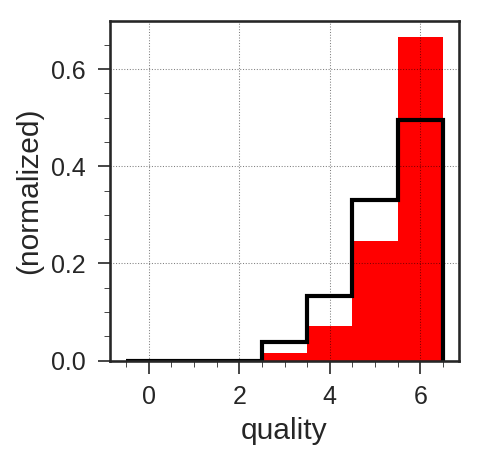

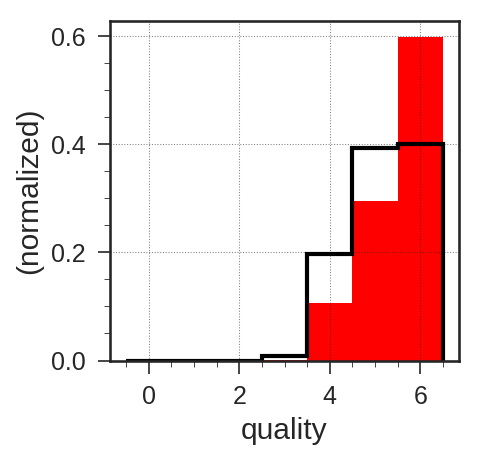

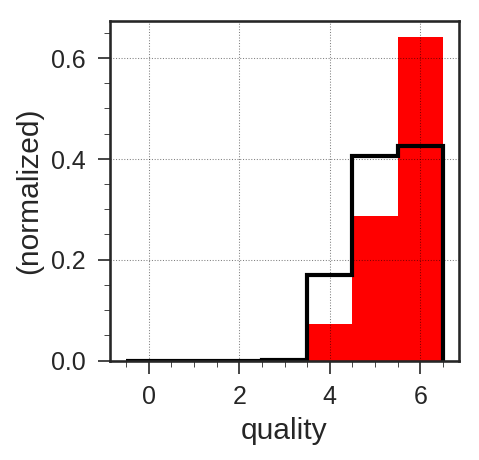

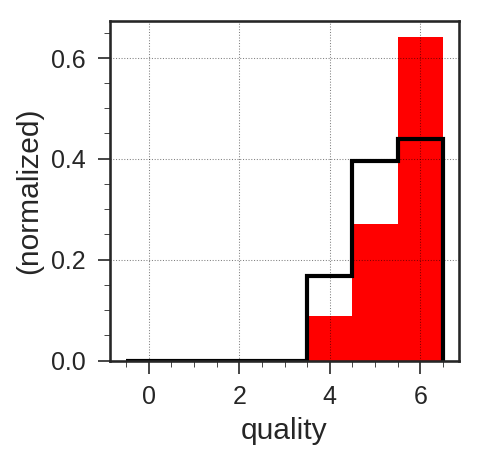

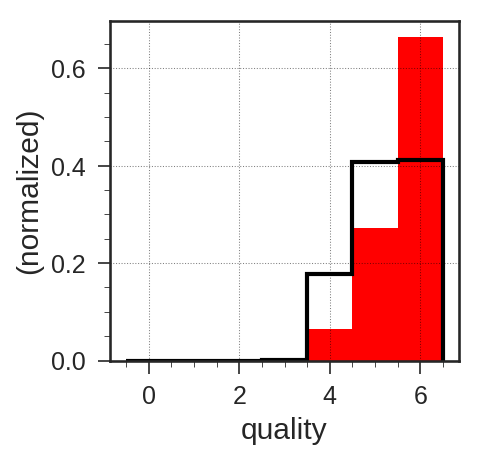

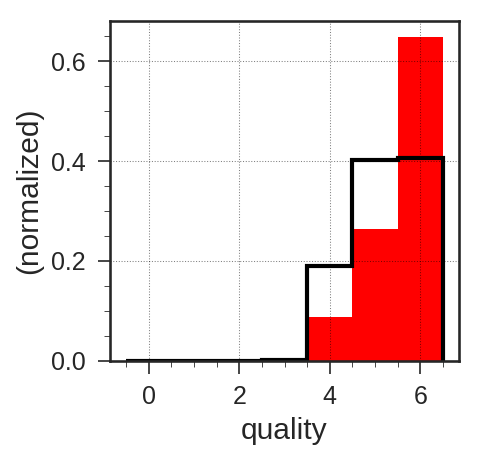

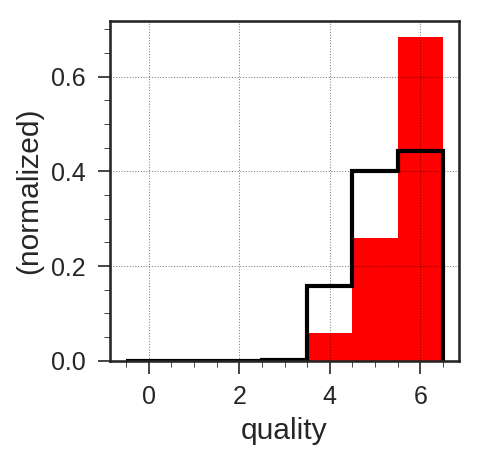

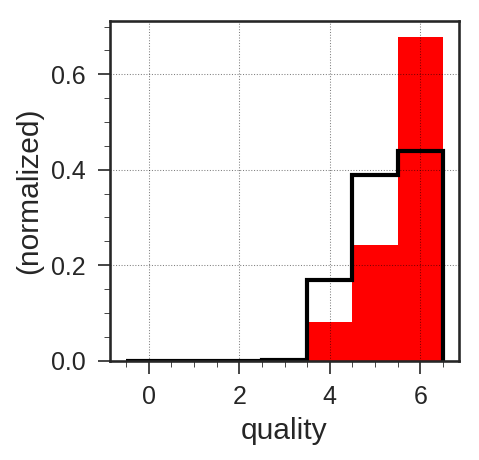

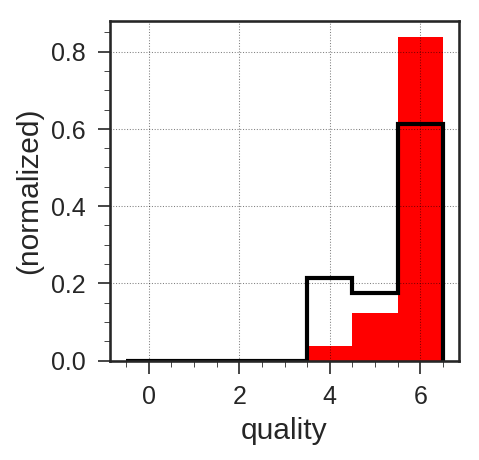

In [7]:
# Plot quality for ME1/1, ME1/2, ME2, ME3, ME4, ME0, MB1, MB2, MB3

for lay in [0,1,2,3,4,11,12,13,14]:
  for ring in [1,2]:
    
    mask = x_mask[...,lay]
    if ring == 1:
      valid = ~mask & ((x_ring[...,lay] == 1) | (x_ring[...,lay] == 4))
    else:
      valid = ~mask & ((x_ring[...,lay] == 2) | (x_ring[...,lay] == 3))
    
    # Muon pT > 8 GeV
    valid = valid & (np.abs(1.0/y_pt) >= 8)

    x_i = x_qual[valid,lay]
    y_i = y_pt[valid]

    if x_i.size == 0: continue
      
    print lay, ring, np.min(x_i), np.max(x_i)

    pu_mask = pu_x_mask[...,lay]
    if ring == 1:
      pu_valid = ~pu_mask & ((pu_x_ring[...,lay] == 1) | (pu_x_ring[...,lay] == 4))
    else:
      pu_valid = ~pu_mask & ((pu_x_ring[...,lay] == 2) | (pu_x_ring[...,lay] == 3))
      
    pu_x_i = pu_x_qual[pu_valid, lay]
    #pu_y_i = pu_y_pt[pu_valid]
    
    print lay, ring, np.min(pu_x_i), np.max(pu_x_i)

    xmin, xmax = -0.5, 6.5
    ymin, ymax = -0.5, 0.5
    xbins = 7
    ybins = 80
    xlabel = r'quality'
    ylabel = r'(normalized)'

    plt.figure(figsize=(3,3))
    _kwargs = dict(density=True, range=(xmin, xmax), bins=xbins)
    plt.hist(np.abs(x_i), histtype='stepfilled', color='red', **_kwargs)
    plt.hist(np.abs(pu_x_i), histtype='step', color='black', linewidth=2, **_kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    continue  # end loop over ring
  continue  # end loop over lay

plt.show()

0 1 -16.0 16.0
0 1 -16.0 16.0
1 2 -16.0 16.0
1 2 -16.0 16.0
2 1 -16.0 16.0
2 1 -16.0 16.0
2 2 -16.0 16.0
2 2 -16.0 16.0
3 1 -16.0 16.0
3 1 -16.0 16.0
3 2 -16.0 16.0
3 2 -16.0 16.0
4 1 -16.0 16.0
4 1 -16.0 16.0
4 2 -16.0 16.0
4 2 -16.0 16.0
11 1 -46.0 48.0
11 1 -47.0 47.0


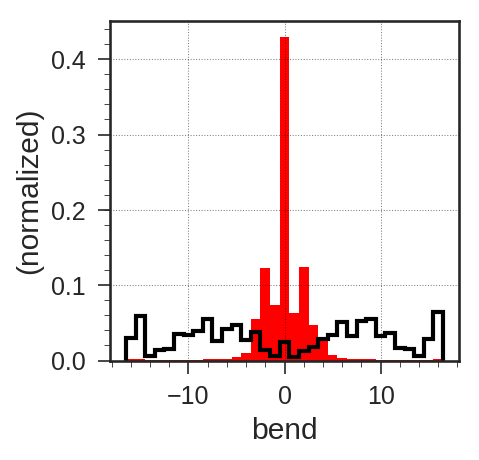

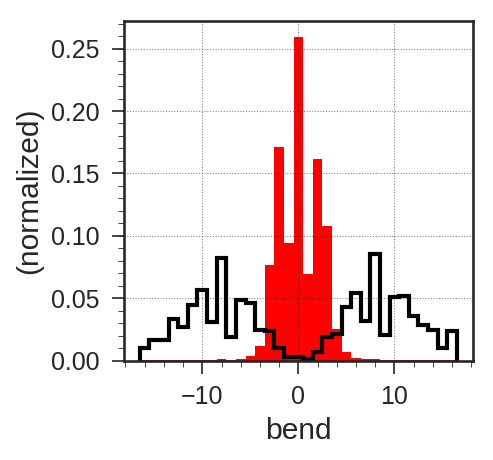

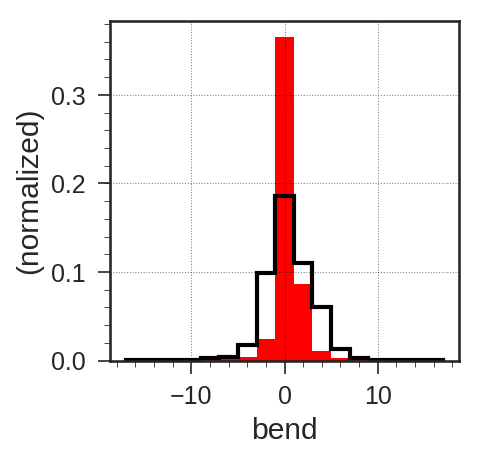

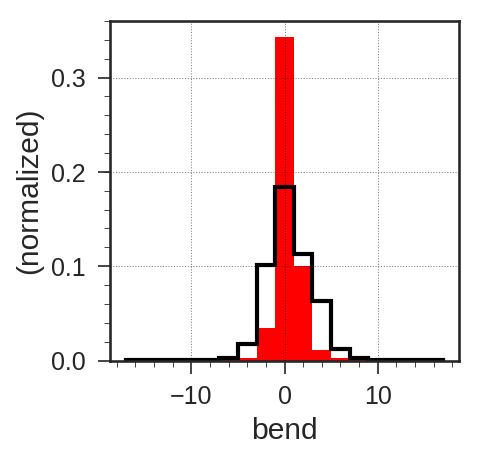

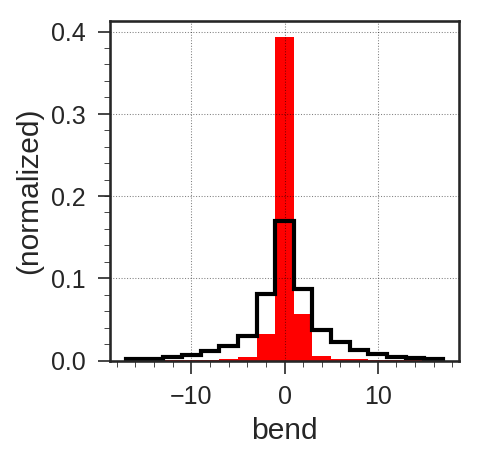

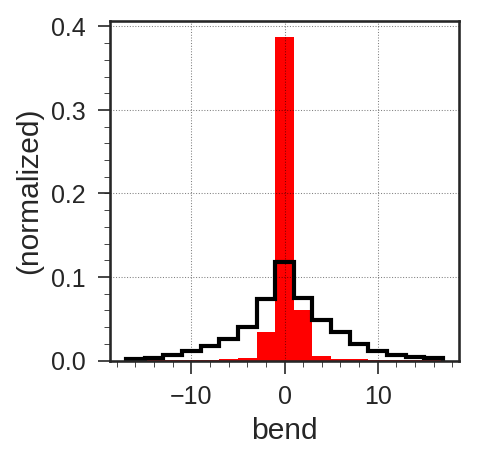

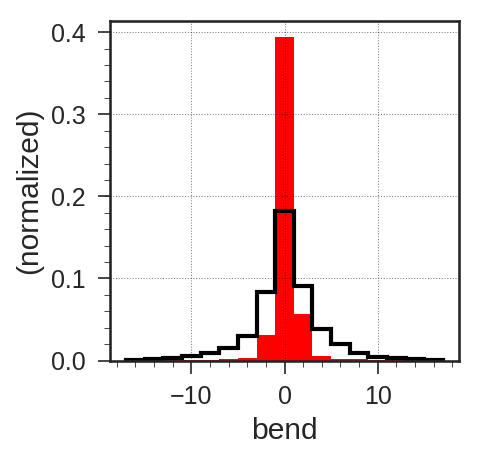

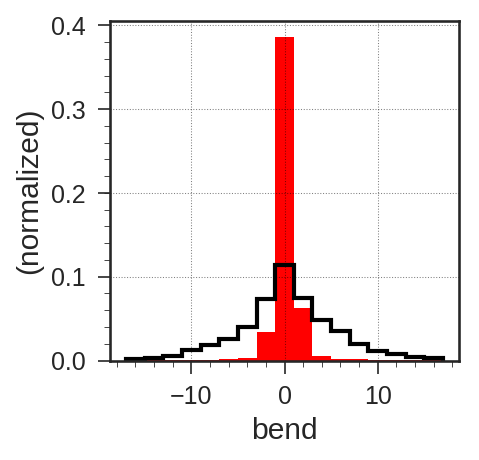

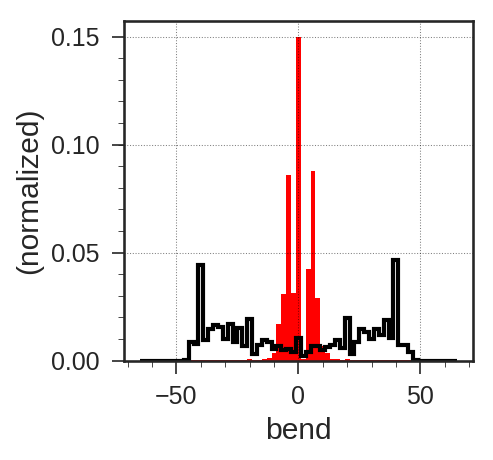

In [8]:
# Plot bend for ME1/1, ME1/2, ME2, ME3, ME4, ME0, MB1, MB2, MB3

for lay in [0,1,2,3,4,11,12,13,14]:
  for ring in [1,2]:
    
    mask = x_mask[...,lay]
    if ring == 1:
      valid = ~mask & ((x_ring[...,lay] == 1) | (x_ring[...,lay] == 4))
    else:
      valid = ~mask & ((x_ring[...,lay] == 2) | (x_ring[...,lay] == 3))
    
    # Muon pT > 8 GeV
    valid = valid & (np.abs(1.0/y_pt) >= 8)

    x_i = x_bend[valid,lay]
    y_i = y_pt[valid]
    if lay in [0,1,2,11,12,13,14]:
      x_i *= -1  # same direction as q/pt

    if x_i.size == 0: continue
      
    print lay, ring, np.min(x_i), np.max(x_i)

    pu_mask = pu_x_mask[...,lay]
    if ring == 1:
      pu_valid = ~pu_mask & ((pu_x_ring[...,lay] == 1) | (pu_x_ring[...,lay] == 4))
    else:
      pu_valid = ~pu_mask & ((pu_x_ring[...,lay] == 2) | (pu_x_ring[...,lay] == 3))
      
    pu_x_i = pu_x_bend[pu_valid, lay]
    #pu_y_i = pu_y_pt[pu_valid]
    if lay in [0,1,2,11,12,13,14]:
      pu_x_i *= -1  # same direction as q/pt
    
    print lay, ring, np.min(pu_x_i), np.max(pu_x_i)

    xmin, xmax = -16.5, 16.5
    ymin, ymax = -0.5, 0.5
    xbins = 33
    ybins = 80
    xlabel = r'bend'
    ylabel = r'(normalized)'
    
    if lay in [2,3,4]:
      xmin, xmax = -17, 17
      xbins = 17
    elif lay in [11,]:
      xmin, xmax = -65, 65
      xbins = 65
    elif lay in [12,13,14]:
      xmin, xmax = -516, 516
      xbins = 129

    plt.figure(figsize=(3,3))
    _kwargs = dict(density=True, range=(xmin, xmax), bins=xbins)
    plt.hist(x_i, histtype='stepfilled', color='red', **_kwargs)
    plt.hist(pu_x_i, histtype='step', color='black', linewidth=2, **_kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    continue  # end loop over ring
  continue  # end loop over lay

plt.show()